In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
# from sklearn import tree

In [2]:
#data processing
df = pd.read_csv('insurance.csv')
df = df.replace(["male", "female"], [0, 1])
df = df.replace(["yes", "no"], [1, 0])
df = df.replace(["southeast", "southwest", "northeast", "northwest"], [0, 1, 2, 3])
#dropping age and sex feature
X = df.drop(["charges"], axis = 1)
Y = df["charges"]
twoD_Y = np.array(Y)
twoD_X = np.array(X)

# 1.StratifiedKFold cross-validation

In [3]:
#split the dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(twoD_X, twoD_Y, test_size=0.33, random_state=42)
print(X_test)

[[45.     1.    25.175  2.     0.     2.   ]
 [36.     1.    30.02   0.     0.     3.   ]
 [64.     1.    26.885  0.     1.     3.   ]
 ...
 [53.     0.    21.4    1.     0.     1.   ]
 [26.     1.    29.64   4.     0.     2.   ]
 [23.     0.    32.56   0.     0.     0.   ]]


In [4]:
#label to charge dataset from 0 to 6
scaled_Y = (preprocessing.scale(Y_train))
new_matrix = []
for i in range(len(scaled_Y)):
    if scaled_Y[i] <= (-1):
        scaled_Y[i] = 0
        new_matrix.append(0)
    elif scaled_Y[i] > (-1) and scaled_Y[i] <= 0:
        scaled_Y[i] = 1
        new_matrix.append(1)
    elif scaled_Y[i] > (0) and scaled_Y[i] <= 1:
        scaled_Y[i] = 2
        new_matrix.append(2)
    elif scaled_Y[i] > (1) and scaled_Y[i] <= 2:
        scaled_Y[i] = 3
        new_matrix.append(3)
    elif scaled_Y[i] > 2 and scaled_Y[i] <= 3:
        scaled_Y[i] = 4
        new_matrix.append(4)
    elif scaled_Y[i] > 3 and scaled_Y[i] <= 4:
        scaled_Y[i] = 5
        new_matrix.append(5)
    elif scaled_Y[i] > 4:
        scaled_Y[i] = 6
        new_matrix.append(6)
print(Counter(new_matrix))
new_matrix = np.array(new_matrix).reshape(-1, 1)
print(len(new_matrix))

Counter({1: 594, 2: 153, 3: 68, 4: 60, 0: 15, 5: 5, 6: 1})
896


In [5]:
#now use train data for cross_validation
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=False, random_state=42)

In [6]:
#Linear regression 10th iteration
reg_Linear = linear_model.LinearRegression()
i = 0
for train_index, test_index in skf.split(X_train, new_matrix):
    i = i + 1
    if i == 10:
        reg_Linear.fit(X_train[train_index], Y_train[train_index])
        Y_pred = reg_Linear.predict(X_train[test_index])
        # The root mean squared error
        print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_train[test_index], Y_pred)))
        break


Mean squared error: 5707.08


/home/rish/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [7]:
#Using ridge regression 10th iteration
from sklearn.linear_model import Ridge
reg_ridge = Ridge(alpha=1.0)
i = 0
for train_index, test_index in skf.split(X_train, new_matrix):
    i = i + 1
    if i == 10:
        reg_ridge.fit(X_train[train_index], Y_train[train_index])
        Y_pred = reg_ridge.predict(X_train[test_index])
        # The root mean squared error
        print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_train[test_index], Y_pred)))
        break

Mean squared error: 5708.72


/home/rish/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [8]:
#Using Bayesian Ridge Regression 10th iteration
reg_bay = linear_model.BayesianRidge()
i = 0
for train_index, test_index in skf.split(X_train, new_matrix):
    i = i + 1
    if i == 10:
        reg_bay.fit(X_train[train_index], Y_train[train_index])
        Y_pred = reg_bay.predict(X_train[test_index])
        #         # The mean squared error
        print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_train[test_index], Y_pred)))
        break

Mean squared error: 5707.67


/home/rish/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [9]:
#predict using .....

In [10]:
#Lasso regression 10th iteration
reg_lasso = linear_model.Lasso(alpha = 0.1)
i = 0
for train_index, test_index in skf.split(X_train, new_matrix):
    i = i + 1
    if i == 10:
        reg_lasso.fit(X_train[train_index], Y_train[train_index])
        Y_pred = reg_lasso.predict(X_train[test_index])
        #         # The mean squared error
        print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_train[test_index], Y_pred)))
        break

Mean squared error: 5707.10


/home/rish/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [11]:
#predict using model

In [12]:
#Lasso Least Angle Regression 10th iteration
reg_Lasso_LAR = linear_model.LassoLars(alpha=10)
i = 0
for train_index, test_index in skf.split(X_train, new_matrix):
    i = i + 1
    if i == 10:
        reg_Lasso_LAR.fit(X_train[train_index], Y_train[train_index])
        Y_pred = reg_Lasso_LAR.predict(X_train[test_index])
        #         # The mean squared error
        print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_train[test_index], Y_pred)))
        break

Mean squared error: 5761.26


/home/rish/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [13]:
#Random forest regressor 3rd
from sklearn.ensemble import RandomForestRegressor
reg_RF = RandomForestRegressor(max_depth=2, random_state=0)
i = 0
for train_index, test_index in skf.split(X_train, new_matrix):
    i = i + 1
    if i== 3:
        reg_RF.fit(X_train[train_index], Y_train[train_index])
        Y_pred = reg_RF.predict(X_train[test_index])
        #         # The mean squared error
        print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_train[test_index], Y_pred)))
        break


Mean squared error: 4198.55


/home/rish/.local/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/home/rish/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [14]:
#Decision tree regressor 6th
from sklearn import tree
i = 0
reg_DT = tree.DecisionTreeRegressor()
for train_index, test_index in skf.split(X_train, new_matrix):
    i = i + 1
    if i == 6:
        reg_DT.fit(X_train[train_index], Y_train[train_index])
        Y_pred = reg_DT.predict(X_train[test_index])
        #         # The mean squared error
        print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_train[test_index], Y_pred)))
        break


Mean squared error: 6013.04


/home/rish/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [15]:
model_vs_err1 = {}
model_vs_err1.update({"DecisionTreeRegressor" : sqrt(mean_squared_error(Y_test, reg_DT.predict(X_test)))})
model_vs_err1.update({"RandomForestRegressor" : sqrt(mean_squared_error(Y_test, reg_RF.predict(X_test)))})
model_vs_err1.update({"LassoLars" : sqrt(mean_squared_error(Y_test, reg_Lasso_LAR.predict(X_test)))})
model_vs_err1.update({"Lasso" : sqrt(mean_squared_error(Y_test, reg_lasso.predict(X_test)))})
model_vs_err1.update({"BayesianRidge" : sqrt(mean_squared_error(Y_test, reg_bay.predict(X_test)))})
model_vs_err1.update({"Ridge" : sqrt(mean_squared_error(Y_test, reg_ridge.predict(X_test)))})
model_vs_err1.update({"LinearRegression" : sqrt(mean_squared_error(Y_test, reg_Linear.predict(X_test)))})
print(model_vs_err1)

{'DecisionTreeRegressor': 6278.075404740525, 'RandomForestRegressor': 4898.998634156379, 'LassoLars': 5973.187341131942, 'Lasso': 5932.700035419746, 'BayesianRidge': 5933.505331926118, 'Ridge': 5934.8920221253975, 'LinearRegression': 5932.698879418685}


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=list(model_vs_err1.keys()), y=list(model_vs_err1.values()))
plt.xticks(rotation= 90)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Models vs RMSE')
plt.show()

<Figure size 640x480 with 1 Axes>

# 2.Bootstrapping

In [17]:
#split the dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(twoD_X, twoD_Y, test_size=0.33, random_state=42)

In [18]:
from sklearn.utils import resample
X_train_boot=[]
Y_train_boot=[]
for i in range (1,11):
    X_train_boot.append( resample(X_train,replace=True,random_state=i ))
    Y_train_boot.append(resample(Y_train,replace=True,random_state=i ))   
reg_Linear = linear_model.LinearRegression()

In [19]:
for i in range (0,10):
    reg_Linear.fit(X_train_boot[i], Y_train_boot[i])
    Y_pred = reg_Linear.predict(X_test)
    # The root mean squared error
    print("root Mean squared error: %.2f"% sqrt(mean_squared_error(Y_test, Y_pred))) 
# since best result is from i=8
reg_Linear.fit(X_train_boot[8], Y_train_boot[8])

root Mean squared error: 5975.85
root Mean squared error: 5938.27
root Mean squared error: 5957.09
root Mean squared error: 5975.69
root Mean squared error: 5938.59
root Mean squared error: 5967.44
root Mean squared error: 5956.11
root Mean squared error: 5994.48
root Mean squared error: 5916.63
root Mean squared error: 5959.60


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
#Using ridge regression 10th iteration
from sklearn.linear_model import Ridge
reg_ridge = Ridge(alpha=1.0)
for i in range (0,10):
    reg_ridge.fit(X_train_boot[i], Y_train_boot[i])
    Y_pred = reg_ridge.predict(X_test)
    # The root mean squared error
    print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_test, Y_pred)))
# since best result is from i=8
reg_ridge.fit(X_train_boot[8], Y_train_boot[8])

Mean squared error: 5980.97
Mean squared error: 5942.04
Mean squared error: 5959.63
Mean squared error: 5973.97
Mean squared error: 5942.58
Mean squared error: 5971.11
Mean squared error: 5957.89
Mean squared error: 5995.50
Mean squared error: 5914.46
Mean squared error: 5963.04


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [21]:
#Using Bayesian Ridge Regression 10th iteration
reg_bay = linear_model.BayesianRidge()
i = 0
for i in range (0,10):
    reg_bay.fit(X_train_boot[i], Y_train_boot[i])
    Y_pred = reg_bay.predict(X_test)
    # The root mean squared error
    print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_test, Y_pred)))
# since best result is from i=8
reg_bay.fit(X_train_boot[8], Y_train_boot[8])

Mean squared error: 5977.82
Mean squared error: 5939.86
Mean squared error: 5957.97
Mean squared error: 5975.00
Mean squared error: 5940.34
Mean squared error: 5969.08
Mean squared error: 5956.74
Mean squared error: 5994.82
Mean squared error: 5915.73
Mean squared error: 5960.87


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [22]:
#Lasso regression 10th iteration
reg_lasso = linear_model.Lasso(alpha = 0.1)
for i in range (0,10):
    reg_lasso.fit(X_train_boot[i], Y_train_boot[i])
    Y_pred = reg_lasso.predict(X_test)
    # The root mean squared error
    print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_test, Y_pred)))
# since best result is from i=8
reg_lasso.fit(X_train_boot[8], Y_train_boot[8])

Mean squared error: 5975.85
Mean squared error: 5938.28
Mean squared error: 5957.09
Mean squared error: 5975.67
Mean squared error: 5938.59
Mean squared error: 5967.44
Mean squared error: 5956.12
Mean squared error: 5994.47
Mean squared error: 5916.64
Mean squared error: 5959.61


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [23]:
#Lasso Least Angle Regression 10th iteration
reg_Lasso_LAR = linear_model.LassoLars(alpha=10)
for i in range (0,10):
    reg_Lasso_LAR.fit(X_train_boot[i], Y_train_boot[i])
    Y_pred = reg_Lasso_LAR.predict(X_test)
    # The root mean squared error
    print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_test, Y_pred)))
# since best result is from i=8
reg_Lasso_LAR.fit(X_train_boot[8], Y_train_boot[8])

Mean squared error: 6003.81
Mean squared error: 6005.13
Mean squared error: 6004.10
Mean squared error: 5975.30
Mean squared error: 5975.18
Mean squared error: 6001.01
Mean squared error: 5999.98
Mean squared error: 6024.17
Mean squared error: 5965.39
Mean squared error: 6012.59


LassoLars(alpha=10, copy_X=True, eps=2.220446049250313e-16,
     fit_intercept=True, fit_path=True, max_iter=500, normalize=True,
     positive=False, precompute='auto', verbose=False)

In [24]:
#Random forest regressor 3rd
from sklearn.ensemble import RandomForestRegressor
reg_RF = RandomForestRegressor(max_depth=2, random_state=0)
for i in range (0,10):
    reg_RF.fit(X_train_boot[i], Y_train_boot[i])
    Y_pred = reg_RF.predict(X_test)
    # The root mean squared error
    print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_test, Y_pred)))
# since best result is from i=8
reg_RF.fit(X_train_boot[1], Y_train_boot[1])

Mean squared error: 4927.72
Mean squared error: 4894.36
Mean squared error: 5008.24
Mean squared error: 4958.40
Mean squared error: 4959.85
Mean squared error: 4983.78
Mean squared error: 5066.86
Mean squared error: 4992.17
Mean squared error: 4962.02
Mean squared error: 4968.96


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [25]:
#Decision tree regressor 6th
from sklearn import tree
reg_DT = tree.DecisionTreeRegressor()
for i in range (0,10):
    reg_DT.fit(X_train_boot[i], Y_train_boot[i])
    Y_pred = reg_DT.predict(X_test)
    # The root mean squared error
    print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_test, Y_pred)))
# since best result is from i=8
reg_DT.fit(X_train_boot[6], Y_train_boot[6])

Mean squared error: 6835.36
Mean squared error: 6689.27
Mean squared error: 6515.29
Mean squared error: 6867.18
Mean squared error: 6010.16
Mean squared error: 6487.44
Mean squared error: 5813.66
Mean squared error: 6582.08
Mean squared error: 6250.36
Mean squared error: 6573.71


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [26]:
model_vs_err2 = {}
model_vs_err2.update({"DecisionTreeRegressor" : sqrt(mean_squared_error(Y_test, reg_DT.predict(X_test)))})
model_vs_err2.update({"RandomForestRegressor" : sqrt(mean_squared_error(Y_test, reg_RF.predict(X_test)))})
model_vs_err2.update({"LassoLars" : sqrt(mean_squared_error(Y_test, reg_Lasso_LAR.predict(X_test)))})
model_vs_err2.update({"Lasso" : sqrt(mean_squared_error(Y_test, reg_lasso.predict(X_test)))})
model_vs_err2.update({"BayesianRidge" : sqrt(mean_squared_error(Y_test, reg_bay.predict(X_test)))})
model_vs_err2.update({"Ridge" : sqrt(mean_squared_error(Y_test, reg_ridge.predict(X_test)))})
model_vs_err2.update({"LinearRegression" : sqrt(mean_squared_error(Y_test, reg_Linear.predict(X_test)))})
print(model_vs_err2)

{'DecisionTreeRegressor': 5746.199970296565, 'RandomForestRegressor': 4894.364872702751, 'LassoLars': 5965.386764020122, 'Lasso': 5916.640618921181, 'BayesianRidge': 5915.725620916385, 'Ridge': 5914.456514516512, 'LinearRegression': 5916.633023160509}


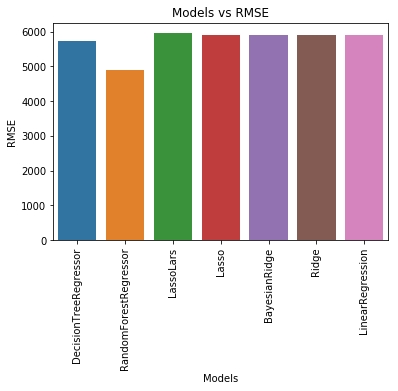

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=list(model_vs_err2.keys()), y=list(model_vs_err2.values()))
plt.xticks(rotation= 90)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Models vs RMSE')
plt.show()

# 3.Holdout method

In [28]:
#split the dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(twoD_X, twoD_Y, test_size=0.33, random_state=42)

In [29]:
X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(X_train, Y_train, test_size=0.33, random_state=42)

In [30]:
#Linear regression 10th iteration
reg_Linear = linear_model.LinearRegression()
reg_Linear.fit(X_train_c, Y_train_c)
Y_pred = reg_Linear.predict(X_test_c)
# The root mean squared error
print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_test_c, Y_pred)))

Mean squared error: 6136.32


In [31]:
#Using ridge regression 10th iteration
from sklearn.linear_model import Ridge
reg_ridge = Ridge(alpha=1.0)
reg_ridge.fit(X_train_c, Y_train_c)
Y_pred = reg_ridge.predict(X_test_c)
# The root mean squared error
print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_test_c, Y_pred)))


Mean squared error: 6135.18


In [32]:
#Using Bayesian Ridge Regression 10th iteration
reg_bay = linear_model.BayesianRidge()
reg_bay.fit(X_train_c, Y_train_c)
Y_pred = reg_bay.predict(X_test_c)
#         # The mean squared error
print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_test_c, Y_pred)))


Mean squared error: 6135.68


In [33]:
#Lasso regression 10th iteration
reg_lasso = linear_model.Lasso(alpha = 0.1)
reg_lasso.fit(X_train_c, Y_train_c)
Y_pred = reg_lasso.predict(X_test_c)
# The mean squared error
print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_test_c, Y_pred)))


Mean squared error: 6136.29


In [34]:
#Lasso Least Angle Regression 10th iteration
reg_Lasso_LAR = linear_model.LassoLars(alpha=10)
reg_Lasso_LAR.fit(X_train_c, Y_train_c)
Y_pred = reg_Lasso_LAR.predict(X_test_c)
#         # The mean squared error
print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_test_c, Y_pred)))

Mean squared error: 6098.22


In [35]:
#Random forest regressor 3rd
from sklearn.ensemble import RandomForestRegressor
reg_RF = RandomForestRegressor(max_depth=2, random_state=0)
reg_RF.fit(X_train_c, Y_train_c)
Y_pred = reg_RF.predict(X_test_c)
#         # The mean squared error
print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_test_c, Y_pred)))

Mean squared error: 4931.62


In [36]:
#Decision tree regressor 6th
from sklearn import tree
reg_DT = tree.DecisionTreeRegressor()
reg_DT.fit(X_train_c, Y_train_c)
Y_pred = reg_DT.predict(X_test_c)
#         # The mean squared error
print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_test_c, Y_pred)))


Mean squared error: 7215.96


In [37]:
model_vs_err3 = {}
model_vs_err3.update({"DecisionTreeRegressor" : sqrt(mean_squared_error(Y_test, reg_DT.predict(X_test)))})
model_vs_err3.update({"RandomForestRegressor" : sqrt(mean_squared_error(Y_test, reg_RF.predict(X_test)))})
model_vs_err3.update({"LassoLars" : sqrt(mean_squared_error(Y_test, reg_Lasso_LAR.predict(X_test)))})
model_vs_err3.update({"Lasso" : sqrt(mean_squared_error(Y_test, reg_lasso.predict(X_test)))})
model_vs_err3.update({"BayesianRidge" : sqrt(mean_squared_error(Y_test, reg_bay.predict(X_test)))})
model_vs_err3.update({"Ridge" : sqrt(mean_squared_error(Y_test, reg_ridge.predict(X_test)))})
model_vs_err3.update({"LinearRegression" : sqrt(mean_squared_error(Y_test, reg_Linear.predict(X_test)))})
print(model_vs_err3)

{'DecisionTreeRegressor': 6380.708557804768, 'RandomForestRegressor': 4927.090227347909, 'LassoLars': 5960.673045169935, 'Lasso': 5952.188490445702, 'BayesianRidge': 5953.124887145762, 'Ridge': 5954.9283289239465, 'LinearRegression': 5952.195079883145}


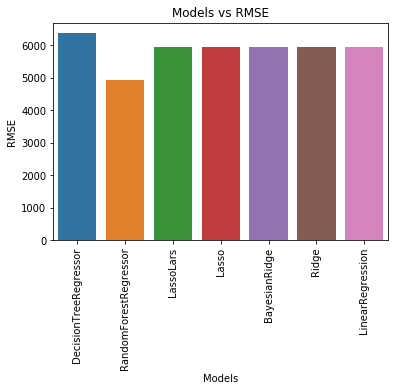

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=list(model_vs_err3.keys()), y=list(model_vs_err3.values()))
plt.xticks(rotation= 90)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Models vs RMSE')
plt.show()

# Stratified holdout 

In [39]:
#label to charge dataset from 0 to 6
scaled_Y = (preprocessing.scale(Y))
new_matrix = []
for i in range(len(scaled_Y)):
    if scaled_Y[i] <= (-1):
        scaled_Y[i] = 0
        new_matrix.append(0)
    elif scaled_Y[i] > (-1) and scaled_Y[i] <= 0:
        scaled_Y[i] = 1
        new_matrix.append(1)
    elif scaled_Y[i] > (0) and scaled_Y[i] <= 1:
        scaled_Y[i] = 2
        new_matrix.append(2)
    elif scaled_Y[i] > (1) and scaled_Y[i] <= 2:
        scaled_Y[i] = 3
        new_matrix.append(3)
    elif scaled_Y[i] > 2 and scaled_Y[i] <= 3:
        scaled_Y[i] = 4
        new_matrix.append(4)
    elif scaled_Y[i] > 3 and scaled_Y[i] <= 4:
        scaled_Y[i] = 5
        new_matrix.append(5)
    elif scaled_Y[i] > 4:
        scaled_Y[i] = 6
        new_matrix.append(6)
print(Counter(new_matrix))
new_matrix = np.array(new_matrix).reshape(-1, 1)
print(len(new_matrix))

Counter({1: 908, 2: 222, 4: 101, 3: 90, 0: 10, 5: 5, 6: 2})
1338


In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(twoD_X, twoD_Y, test_size=0.33, stratify=new_matrix)

In [41]:
X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(twoD_X, twoD_Y, test_size=0.33)

In [42]:
#Linear regression 10th iteration
reg_Linear = linear_model.LinearRegression()
reg_Linear.fit(X_train_c, Y_train_c)
Y_pred = reg_Linear.predict(X_test_c)
# The root mean squared error
print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_test_c, Y_pred)))

Mean squared error: 5967.51


In [43]:
#Using ridge regression 10th iteration
from sklearn.linear_model import Ridge
reg_ridge = Ridge(alpha=1.0)
reg_ridge.fit(X_train_c, Y_train_c)
Y_pred = reg_ridge.predict(X_test_c)
# The root mean squared error
print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_test_c, Y_pred)))


Mean squared error: 5967.33


In [44]:
#Using Bayesian Ridge Regression 10th iteration
reg_bay = linear_model.BayesianRidge()
reg_bay.fit(X_train_c, Y_train_c)
Y_pred = reg_bay.predict(X_test_c)
#         # The mean squared error
print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_test_c, Y_pred)))


Mean squared error: 5967.35


In [45]:
#Lasso regression 10th iteration
reg_lasso = linear_model.Lasso(alpha = 0.1)
reg_lasso.fit(X_train_c, Y_train_c)
Y_pred = reg_lasso.predict(X_test_c)
# The mean squared error
print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_test_c, Y_pred)))


Mean squared error: 5967.49


In [46]:
#Lasso Least Angle Regression 10th iteration
reg_Lasso_LAR = linear_model.LassoLars(alpha=10)
reg_Lasso_LAR.fit(X_train_c, Y_train_c)
Y_pred = reg_Lasso_LAR.predict(X_test_c)
#         # The mean squared error
print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_test_c, Y_pred)))

Mean squared error: 6022.91


In [47]:
#Random forest regressor 3rd
from sklearn.ensemble import RandomForestRegressor
reg_RF = RandomForestRegressor(max_depth=2, random_state=0)
reg_RF.fit(X_train_c, Y_train_c)
Y_pred = reg_RF.predict(X_test_c)
#         # The mean squared error
print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_test_c, Y_pred)))

Mean squared error: 5183.59


In [48]:
#Decision tree regressor 6th
from sklearn import tree
reg_DT = tree.DecisionTreeRegressor()
reg_DT.fit(X_train_c, Y_train_c)
Y_pred = reg_DT.predict(X_test_c)
#         # The mean squared error
print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_test_c, Y_pred)))

Mean squared error: 6339.34


In [49]:
model_vs_err4 = {}
model_vs_err4.update({"DecisionTreeRegressor" : sqrt(mean_squared_error(Y_test, reg_DT.predict(X_test)))})
model_vs_err4.update({"RandomForestRegressor" : sqrt(mean_squared_error(Y_test, reg_RF.predict(X_test)))})
model_vs_err4.update({"LassoLars" : sqrt(mean_squared_error(Y_test, reg_Lasso_LAR.predict(X_test)))})
model_vs_err4.update({"Lasso" : sqrt(mean_squared_error(Y_test, reg_lasso.predict(X_test)))})
model_vs_err4.update({"BayesianRidge" : sqrt(mean_squared_error(Y_test, reg_bay.predict(X_test)))})
model_vs_err4.update({"Ridge" : sqrt(mean_squared_error(Y_test, reg_ridge.predict(X_test)))})
model_vs_err4.update({"LinearRegression" : sqrt(mean_squared_error(Y_test, reg_Linear.predict(X_test)))})
print(model_vs_err4)

{'DecisionTreeRegressor': 3204.57208099246, 'RandomForestRegressor': 5162.7842028280675, 'LassoLars': 6311.306720208713, 'Lasso': 6290.728476771947, 'BayesianRidge': 6290.1447953944125, 'Ridge': 6289.473697065941, 'LinearRegression': 6290.730168716292}


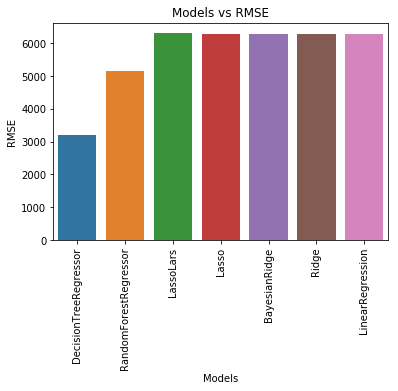

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=list(model_vs_err4.keys()), y=list(model_vs_err4.values()))
plt.xticks(rotation= 90)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Models vs RMSE')
plt.show()

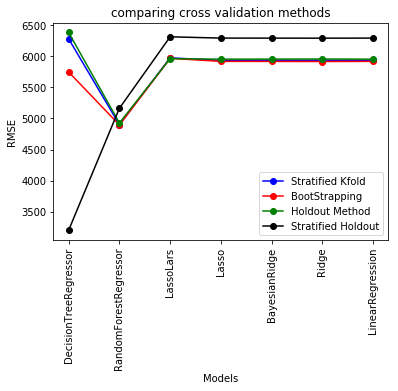

In [61]:
# plot
plt.plot( model_vs_err1.keys(), model_vs_err1.values(), marker='.', markersize=12, color='blue', label="Stratified Kfold")
plt.plot( model_vs_err2.keys(), model_vs_err2.values(), marker='.', markersize=12, color='red', label="BootStrapping")
plt.plot( model_vs_err3.keys(), model_vs_err3.values(), marker='.', markersize=12, color='green', label="Holdout Method")
plt.plot( model_vs_err4.keys(), model_vs_err4.values(), marker='.', markersize=12, color='black', label="Stratified Holdout")
plt.legend()
plt.xticks(rotation= 90)
plt.title('comparing cross validation methods')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.show()